In [704]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [705]:
# Loading the dataset
df = pd.read_csv("E:/downloads/archive (9)/dataset/combined_enron.csv", sep=',', names=['label', 'message'])

# **Exploratory Data Analysis (EDA)**
* Exploring NaN values in dataset
* Plotting countplots for Spam vs. Ham



In [706]:
# Fill all NaN values with 1
df.fillna(1, inplace=True)


In [707]:
df.shape

(33829, 2)

In [708]:
df.columns

Index(['label', 'message'], dtype='object')

In [709]:
df.dtypes

label      object
message    object
dtype: object

In [710]:
df.head()

,label,message
0,label,text
1,ham,subject fw weather sites this is the list of w...
2,spam,subject i cant believe the changma wow wow wow...
3,spam,subject 4 color printing special request addit...
4,spam,subject nobody can beat us poloponybreakaway i...


In [711]:
df.tail()

,label,message
33824,on s column i wondered about the genesis of a ...,1
33825,ham,subject hpl meter 981295 hungerford grain comp...
33826,ham,subject re expenses tammie has the receipts fr...
33827,spam,subject comparison report ciearance bundle 1 w...
33828,ham,subject some after thoughts to our meeting hi ...


In [712]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33829 entries, 0 to 33828
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    33829 non-null  object
 1   message  33829 non-null  object
dtypes: object(2)
memory usage: 528.7+ KB


In [713]:
df.describe(include='object')

,label,message
count,33829,33829
unique,106,30155
top,spam,1
freq,17157,126


_**Note: No NaN values** in the dataset._

In [714]:
# Mapping values for label
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [715]:
df.head()

,label,message
0,NaN,text
1,0.0,subject fw weather sites this is the list of w...
2,1.0,subject i cant believe the changma wow wow wow...
3,1.0,subject 4 color printing special request addit...
4,1.0,subject nobody can beat us poloponybreakaway i...


In [716]:
df.tail()

,label,message
33824,NaN,1
33825,0.0,subject hpl meter 981295 hungerford grain comp...
33826,0.0,subject re expenses tammie has the receipts fr...
33827,1.0,subject comparison report ciearance bundle 1 w...
33828,0.0,subject some after thoughts to our meeting hi ...


In [717]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

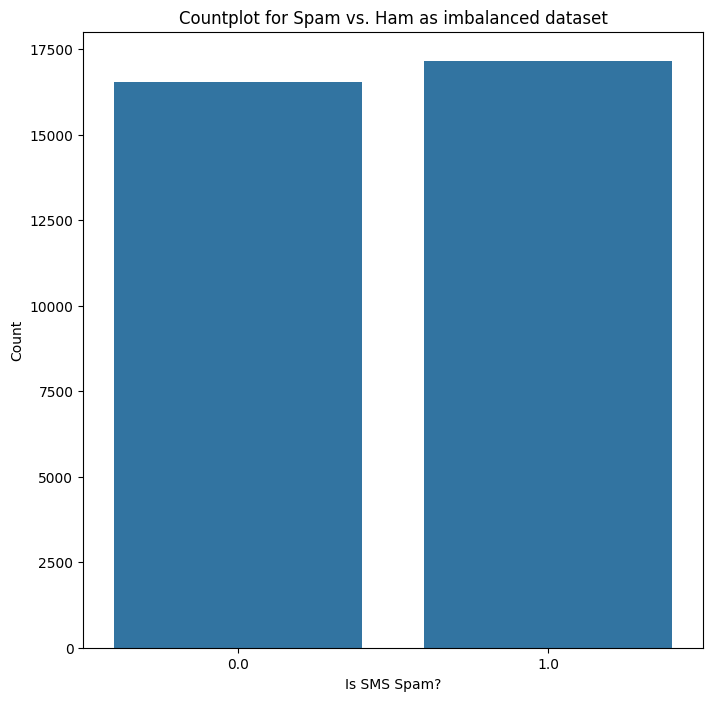

In [718]:
# Countplot for Spam vs. Ham as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot for Spam vs. Ham as imbalanced dataset')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')

_**Insight:** From the above countplot, it is evident that the **dataset is imbalanced**._

# **Feature Engineering**
*   Handling imbalanced dataset using Oversampling
*   Creating new features e.g. word_count, contains_currency_symbol, contains_numbers, etc.



In [719]:
# Handling imbalanced dataset using Oversampling
only_spam = df[df['label']==1]
print('Number of Spam records: {}'.format(only_spam.shape[0]))
print('Number of Ham records: {}'.format(df.shape[0]-only_spam.shape[0]))

Number of Spam records: 17157
Number of Ham records: 16672


In [720]:
count = int((df.shape[0]-only_spam.shape[0])/only_spam.shape[0])
for i in range(0, count-1):
  df = pd.concat([df, only_spam])

df.shape

(33829, 2)

In [721]:
# Countplot for Spam vs. Ham as balanced dataset
#plt.figure(figsize=(8,8))
#g = sns.countplot(x='label', data=df)
#p = plt.title('Countplot for Spam vs. Ham as balanced dataset')
#p = plt.xlabel('Is SMS Spam?')
#p = plt.ylabel('Count')

In [725]:
# Ensure all entries in the 'message' column are strings
df['message'] = df['message'].astype(str)

# Creating new feature 'word_count'
df['word_count'] = df['message'].apply(lambda x: len(x.split()))


In [726]:
df.head()

,label,message,word_count
0,NaN,text,1
1,0.0,subject fw weather sites this is the list of w...,60
2,1.0,subject i cant believe the changma wow wow wow...,56
3,1.0,subject 4 color printing special request addit...,74
4,1.0,subject nobody can beat us poloponybreakaway i...,9


C:\Users\seif\AppData\Local\Temp\ipykernel_27588\1446840367.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df[df['label']==0].word_count)
C:\Users\seif\AppData\Local\Temp\ipykernel_27588\1446840367.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df[df['label']==1].word_coun

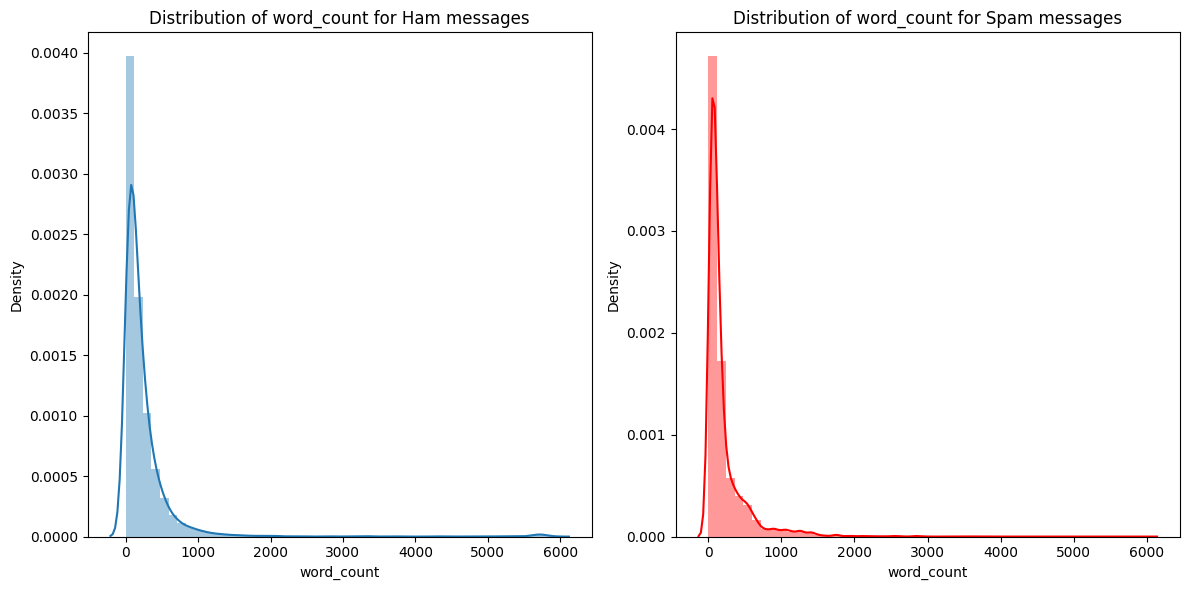

In [727]:
plt.figure(figsize=(12, 6))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=df[df['label']==0].word_count)
p = plt.title('Distribution of word_count for Ham messages')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=df[df['label']==1].word_count, color='red')
p = plt.title('Distribution of word_count for Spam messages')

plt.tight_layout()
plt.show()

_**Insight:** **Spam messages** word_count fall in the range of **15-30 words**, whereas majority of the **Ham messages** fall in the range of **below 25 words**._

In [728]:
# Creating feature contains_currency_symbol
def currency(x):
  currency_symbols = ['€', '$', '¥', '£', '₹']
  for i in currency_symbols:
    if i in x:
      return 1
  return 0

df['contains_currency_symbol'] = df['message'].apply(currency)

In [729]:
df.tail()

,label,message,word_count,contains_currency_symbol
33824,NaN,1,1,0
33825,0.0,subject hpl meter 981295 hungerford grain comp...,91,0
33826,0.0,subject re expenses tammie has the receipts fr...,66,0
33827,1.0,subject comparison report ciearance bundle 1 w...,112,0
33828,0.0,subject some after thoughts to our meeting hi ...,467,0


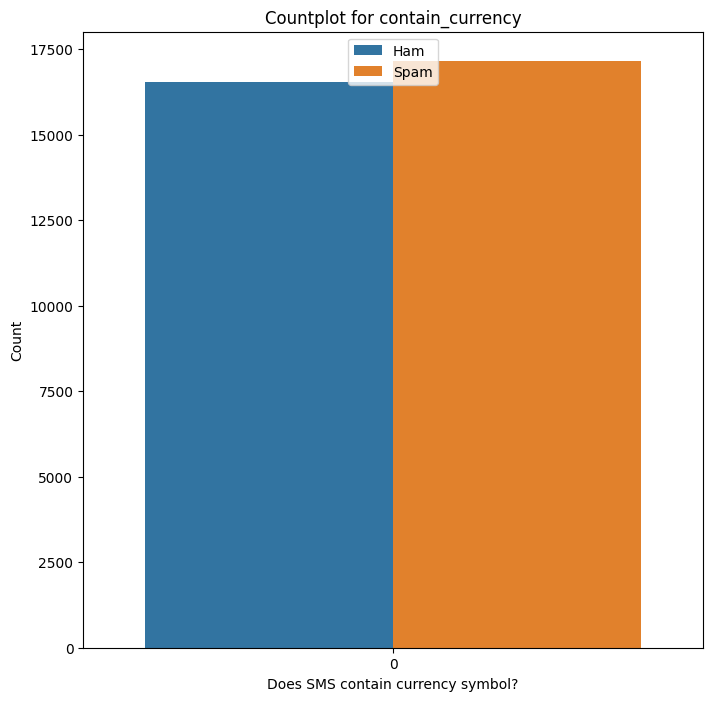

In [730]:
# Countplot for contains_currency_symbol
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_currency_symbol', data=df, hue='label')
p = plt.title('Countplot for contain_currency')
p = plt.xlabel('Does SMS contain currency symbol?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

_**Insight: Almost 1/3 of Spam messages contain currency symbols**, and currency symbols are **rarely used in Ham messages.**_

In [731]:
# Creating feature contains_number
def numbers(x):
  for i in x:
    if ord(i)>=48 and ord(i)<=57:
      return 1
  return 0

df['contains_number'] = df['message'].apply(numbers)

In [732]:
df.head()

,label,message,word_count,contains_currency_symbol,contains_number
0,NaN,text,1,0,0
1,0.0,subject fw weather sites this is the list of w...,60,0,1
2,1.0,subject i cant believe the changma wow wow wow...,56,0,1
3,1.0,subject 4 color printing special request addit...,74,0,1
4,1.0,subject nobody can beat us poloponybreakaway i...,9,0,0


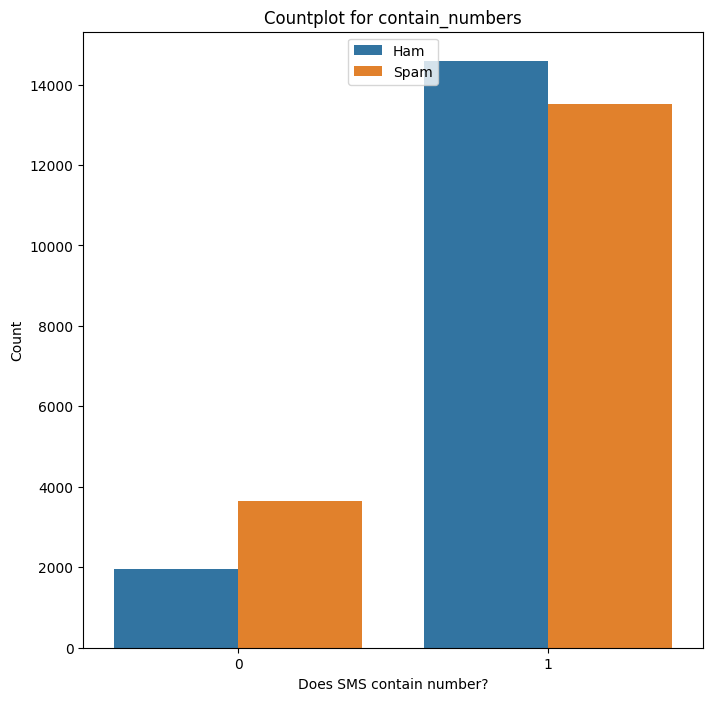

In [733]:
# Countplot for contains_number
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_number', data=df, hue='label')
p = plt.title('Countplot for contain_numbers')
p = plt.xlabel('Does SMS contain number?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

_**Insight:** It is evident that **most of the Spam messages contain numbers,** and **majority of the Ham messages donot contain numbers.**_

# **Data Cleaning**
* Removing special character and numbers using regular expression
* Converting the entire sms into lower case
* Tokenizing the sms by words
* Removing the stop words
* Lemmatizing the words
* Joining the lemmatized words
* Building a corpus of messages

In [734]:
# Importing essential libraries for performing NLP
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\seif\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [735]:
# Cleaning the messages
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(df.message):

  # Cleaning special character from the sms
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)

  # Converting the entire sms into lower case
  message = message.lower()

  # Tokenizing the sms by words
  words = message.split()

  # Removing the stop words
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Lemmatizing the words
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

  # Joining the lemmatized words
  message = ' '.join(lemmatized_words)

  # Building a corpus of messages
  corpus.append(message)

In [736]:
corpus[0:3]

['text',
 'subject fw weather site list weather site preston us report weather trend nng tw morning meeting tk original message roobaert preston sent monday january lohman tk subject weather site research group site http www weather com http www noaa gov http www cnn com weather',
 'subject cant believe changma wow wow wow unbeliebable patch effect traditional cialis performance love life increase hesitate improve impress http rz e fzf com c etechmedia nice day hvhob kwjtw gedctb xziqax']

In [737]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df['label']

# **Model Building & Evaluation**
_**Metric: F1-Score**_

* Multiomail Naive Bayes: 0.943
* Decision Tree: 0.98
* **Random Forest (Ensemble): 0.994**
* Voting (Multinomial Naive Bayes + Decision Tree): 0.98


In [738]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [739]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [740]:
y.fillna(method='ffill', inplace=True)  # Forward fill
y.fillna(method='bfill', inplace=True)  # Backward fill


In [745]:
# Check for NaN values in y_train and y_test
print("Number of NaN values in y_train:", y.isna().sum())
print("Number of NaN values in y_test:", y_test.isna().sum())

# Fill NaN values in y_train with 1
y_train.fillna(0, inplace=True)

# Do the same for y_test if necessary
y_test.fillna(0, inplace=True)


Number of NaN values in y_train: 0
Number of NaN values in y_test: 33


In [746]:
# Check for NaN values in y_train and y_test
print("Number of NaN values in y_train:", y_train.isna().sum())
print("Number of NaN values in y_test:", y_test.isna().sum())

# Reset the indices of X_train and y_train to ensure alignment
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Combine features and target, then drop rows with NaN values
train_data = pd.concat([X_train, y_train], axis=1)  # Combine features and target
train_data = train_data.dropna()  # Drop rows with NaN in any column

# Separate the filtered data back into X_train and y_train
X_train = train_data.drop('label', axis=1)  # Assuming 'label' is your target column name
y_train = train_data['label']

# Reset the indices of X_test and y_test, if necessary
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Do the same for X_test and y_test
test_data = pd.concat([X_test, y_test], axis=1)
test_data = test_data.dropna()

X_test = test_data.drop('label', axis=1)
y_test = test_data['label']


Number of NaN values in y_train: 0
Number of NaN values in y_test: 0


In [ ]:
# Check for NaN values in y_train and y_test
print("Number of NaN values in y_train:", y.isna().sum())
print("Number of NaN values in y_test:", y_test.isna().sum())

# Fill NaN values in y_train with 1
y_train.fillna(1, inplace=True)

# Do the same for y_test if necessary
y_test.fillna(1, inplace=True)


Number of NaN values in y_train: 0
Number of NaN values in y_test: 0


In [741]:
# Check shapes of X and y
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Handle missing values if needed (e.g., using df.dropna())

Shape of X: (33829, 500)
Shape of y: (33829,)


In [742]:
import pandas as pd
import numpy as np

# Assuming your data is in a pandas DataFrame
df = pd.read_csv("E:/downloads/80.000/15,000.csv")

# Check for missing values
print(df.isnull().sum())

label    0
text     0
dtype: int64


In [747]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for MNB model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for MNB model: 0.956 ---
Standard Deviation: 0.004


In [748]:
# Classification report for MNB model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print('--- Classification report for MNB model ---')
print(classification_report(y_test, y_pred))

--- Classification report for MNB model ---
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      3324
         1.0       0.94      0.97      0.95      3442

    accuracy                           0.95      6766
   macro avg       0.95      0.95      0.95      6766
weighted avg       0.95      0.95      0.95      6766



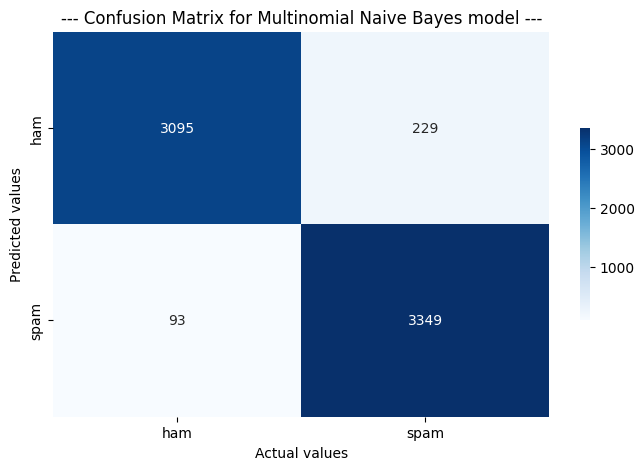

In [749]:
# Confusion matrix of MNB model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Multinomial Naive Bayes model ---')

In [750]:
# Fitting Random Forest to the Training set
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Decision Tree model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Decision Tree model: 0.953 ---
Standard Deviation: 0.004


In [751]:
# Classification report for Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('--- Classification report for Decision Tree model ---')
print(classification_report(y_test, y_pred))

--- Classification report for Decision Tree model ---
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      3324
         1.0       0.95      0.96      0.95      3442

    accuracy                           0.95      6766
   macro avg       0.95      0.95      0.95      6766
weighted avg       0.95      0.95      0.95      6766



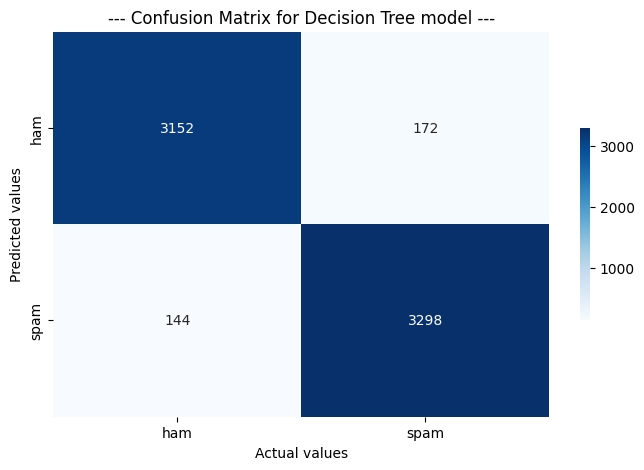

In [752]:
# Confusion matrix of Decision Tree model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Decision Tree model ---')

In [753]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
cv = cross_val_score(rf, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Random Forest model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Random Forest model: 0.972 ---
Standard Deviation: 0.004


In [754]:
# Classification report for Random Forest model
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('--- Classification report for Random Forest model ---')
print(classification_report(y_test, y_pred))

--- Classification report for Random Forest model ---
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      3324
         1.0       0.97      0.98      0.98      3442

    accuracy                           0.97      6766
   macro avg       0.97      0.97      0.97      6766
weighted avg       0.97      0.97      0.97      6766



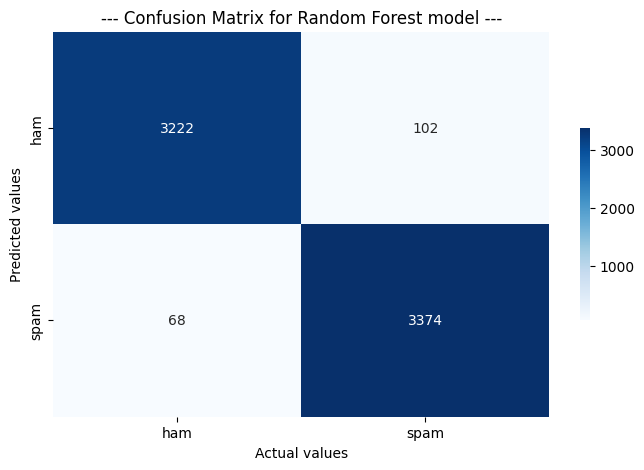

In [755]:
# Confusion matrix of Random Forest model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Random Forest model ---')

_**Note:** Decision Tree & MNB algorithms are selected and fed to Voting algorithm to increase the F1-Score!_

In [756]:
# Fitting Decision Tree and MNB to VotingClassifier
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier([('decision_tree', dt), ('m_naive_bayes', mnb)], weights=[2,1])
cv = cross_val_score(vc, X, y, cv=10, scoring='f1')

print('--- Average F1-Score for VotingClassifier model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for VotingClassifier model: 0.953 ---
Standard Deviation: 0.004


In [757]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)


# Feature extraction using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=100, random_state=21)
rf.fit(X_train, y_train)

# Transform method is not available in RandomForestClassifier; use rf.apply() or a different approach
X_train_features = rf.apply(X_train)
X_test_features = rf.apply(X_test)

# Define the variables for the Embedding layer
max_features = 10000 # Number of unique words to consider (adjust based on your data)
embedding_dim = 128  # Dimension of the dense embedding (common choice: 50, 100, 128)
max_len = 100 # Maximum length of the input sequences (adjust based on your data)

# Build and train LSTM model
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(units=128)) # Adjust number of units
model.add(Dense(1, activation='sigmoid')) # Binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_features, y_train, epochs=10, batch_size=32) # Adjust epochs and batch size

# Evaluate LSTM model
y_pred_lstm = (model.predict(X_test_features) > 0.5).astype("int32") # Binary classification threshold

print('--- Classification report for LSTM model ---')
print(classification_report(y_test, y_pred_lstm))


# Confusion matrix of LSTM model
#cm = confusion_matrix(y_test, y_pred_lstm)

# ... (Rest of your visualization code)# Confusion matrix of Decision Tree model

Epoch 1/10
846/846 [==============================] - 66s 76ms/step - loss: 0.0630 - accuracy: 0.9787
Epoch 2/10
846/846 [==============================] - 68s 81ms/step - loss: 0.0155 - accuracy: 0.9949
Epoch 3/10
846/846 [==============================] - 69s 81ms/step - loss: 0.0079 - accuracy: 0.9972
Epoch 4/10
846/846 [==============================] - 68s 81ms/step - loss: 0.0097 - accuracy: 0.9966
Epoch 5/10
846/846 [==============================] - 68s 81ms/step - loss: 0.0084 - accuracy: 0.9970
Epoch 6/10
846/846 [==============================] - 68s 80ms/step - loss: 0.0077 - accuracy: 0.9970
Epoch 7/10
846/846 [==============================] - 68s 80ms/step - loss: 0.0097 - accuracy: 0.9964
Epoch 8/10
846/846 [==============================] - 68s 80ms/step - loss: 0.0080 - accuracy: 0.9970
Epoch 9/10
846/846 [==============================] - 69s 81ms/step - loss: 0.0067 - accuracy: 0.9974
Epoch 10/10
212/212 [==============================] - 8s 36ms/step
--- Classifica

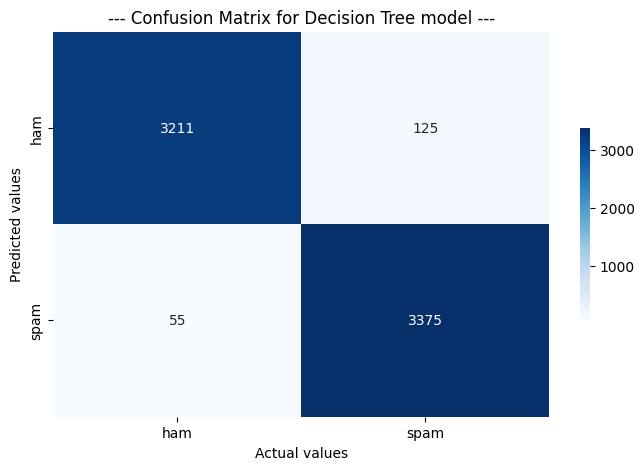

In [758]:

# Confusion matrix of LSTM model
cm = confusion_matrix(y_test, y_pred_lstm)

# ... (Rest of your visualization code)# Confusion matrix of Decision Tree model


plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Decision Tree model ---')

_**Note:** Voting algorithm did not out-perform Random Forest algorithm, hence **Random Forest algorithm is selected for predicting the results of this problem statement.**_


# **Making Predictions**

In [759]:
def predict_spam(sample_message):
  sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  final_message = [wnl.lemmatize(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = tfidf.transform([final_message]).toarray()
  return rf.predict(temp)

In [760]:
# Prediction 1 - Lottery text message
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


C:\Users\seif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [761]:
# Prediction 2 - Casual text chat
sample_message = 'Came to think of it. I have never got a spam message before.'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


C:\Users\seif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [762]:
# Prediction 3 - Transaction confirmation text message
sample_message = 'Sam, your rent payment for Jan 19 has been received. $1,300 will be drafted from your Wells Fargo Account ******0000 within 24-48 business hours. Thank you!'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


C:\Users\seif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [763]:
# Predicting values 4 - Feedback message
sample_message = 'Tammy, thanks for choosing Carl’s Car Wash for your express polish. We would love to hear your thoughts on the service. Feel free to text back with any feedback. Safe driving!'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


C:\Users\seif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
